# Twitter Analysis

This notebook provides some insights into our corpus of tweets from Germany. We collected tweets from major cities and epicentres of COVID-19 beginning with 10th March. In the following, we present some summary statistics and figures to describe our data set.

In [1]:
%matplotlib inline

import sys
sys.path.append("..")


from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import geopandas as gpd

from src.shared import read_parquet_in_date_chunks

In [2]:
df = read_parquet_in_date_chunks("../bld/out/data/tweets-cleaned")

In [3]:
df.head(5)

,username,to,text,retweets,favorites,replies,permalink,author_id,date,hashtags,mentions,urls,state,city
id,,,,,,,,,,,,,,
1237467210949505024,offpulse,None,Der Fux‘n gibt sich jetzt mexikanisch: #RheinR...,0.0,0.0,1.0,https://twitter.com/offpulse/status/1237467210...,2.836726e+08,2020-03-10 19:55:48+00:00,#RheinRuhrTreff #Kolping #Bubenabend,None,https://www.swarmapp.com/c/cGr85JWKMeq,Baden-Wuerttemberg,Freiburg im Breisgau
1237444332795412482,PauleHeyman,BB_Ger,#Corona is ja Egtl jetzt DIE CHANCE für sat1 d...,0.0,0.0,0.0,https://twitter.com/PauleHeyman/status/1237444...,1.251627e+08,2020-03-10 18:24:54+00:00,#Corona #BigFail,None,https://twitter.com/BB_Ger/status/123728763058...,Baden-Wuerttemberg,Freiburg im Breisgau
1237485564309487622,MagicManShow,None,"Es ist unsere Verantwortung, diejenigen Mensch...",0.0,1.0,1.0,https://twitter.com/MagicManShow/status/123748...,4.553677e+07,2020-03-10 21:08:44+00:00,None,None,https://www.tagesspiegel.de/gesellschaft/panor...,Baden-Wuerttemberg,Freiburg im Breisgau
1237392844802801668,BinesBastelstu1,BinesBastelstu1,Zumal die 1000 eine rein willkürliche Zahl ist...,1.0,1.0,2.0,https://twitter.com/BinesBastelstu1/status/123...,1.060280e+18,2020-03-10 15:00:18+00:00,None,None,None,Baden-Wuerttemberg,Heidelberg
1237360752526348288,in_Hemsbach,None,@g7 diebundesregierung Um die Dynamik der Coro...,0.0,0.0,0.0,https://twitter.com/in_Hemsbach/status/1237360...,1.639781e+09,2020-03-10 12:52:47+00:00,None,@G7,https://www.instagram.com/p/B9jcYX_oP7A/?igshi...,Baden-Wuerttemberg,Heidelberg


In [4]:
df.describe()

,retweets,favorites,replies,author_id
count,191800.000000,191800.000000,191800.000000,1.918000e+05
mean,2.299479,9.600845,1.116731,2.810279e+17
std,26.364300,128.223922,8.944902,4.539639e+17
min,0.000000,0.000000,0.000000,2.737000e+03
25%,0.000000,0.000000,0.000000,7.473429e+07
50%,0.000000,1.000000,0.000000,7.877746e+08
75%,1.000000,3.000000,1.000000,7.664104e+17
max,5373.000000,22488.000000,1195.000000,1.250482e+18


### Tweets over time

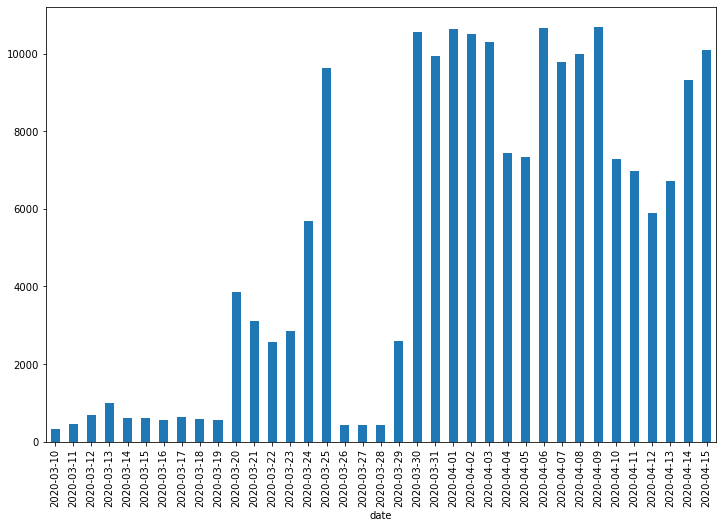

In [5]:
df.groupby(df.date.dt.date).size().plot.bar(figsize=(12, 8))

### Hashtags over time

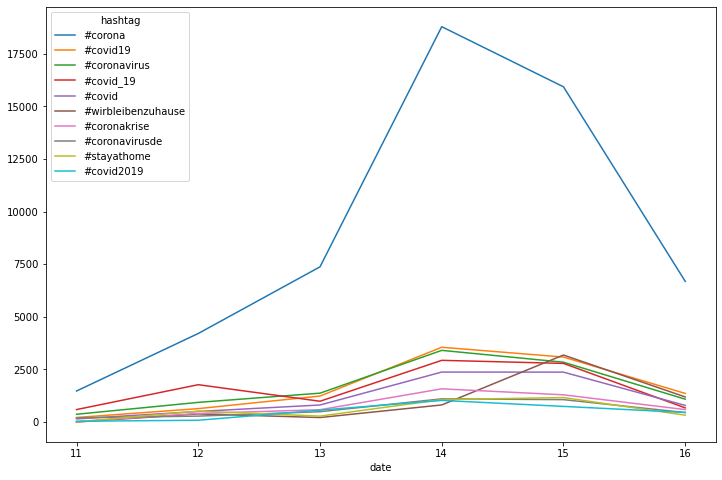

In [6]:
hashtags = df.hashtags.str.split(" ", expand=True).reset_index()
hashtags = (
    hashtags.melt(id_vars="id", value_vars=range(21), value_name="hashtag")
    .drop(columns="variable")
    .dropna()
)    
hashtags = hashtags.merge(df["date"], on="id").drop(columns="id")
hashtags["hashtag"] = hashtags["hashtag"].str.lower()
top_twenty_hashtags = hashtags.hashtag.value_counts()[:10].index
hashtags.groupby(hashtags.date.dt.week)["hashtag"].value_counts().unstack().fillna(0)[top_twenty_hashtags].plot(figsize=(12, 8))

### Number of tweets by state

In [7]:
map_ = gpd.read_file("DEU_adm1.shp")

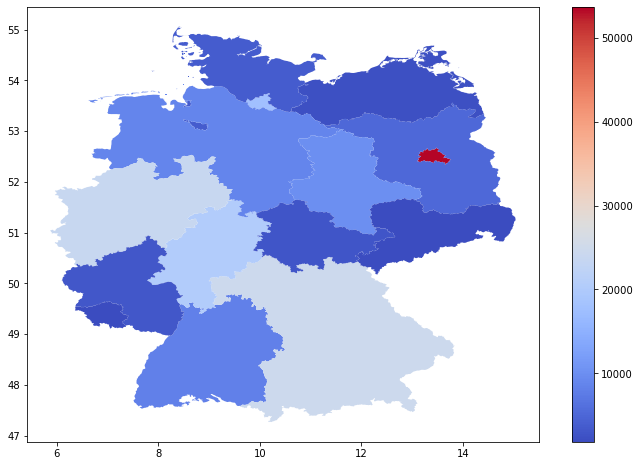

In [8]:
fig, ax = plt.subplots(figsize=(12, 8))

map_.plot(column=df.groupby("state").size(), cmap="coolwarm", legend=True, ax=ax)

plt.show()
plt.close()

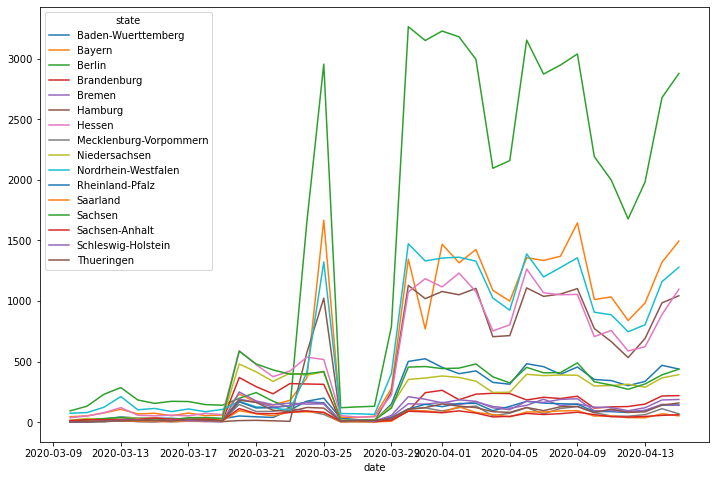

In [9]:
df.groupby([df.state, df.date.dt.date]).size().unstack().T.plot(figsize=(12, 8))

### Sources used in tweets

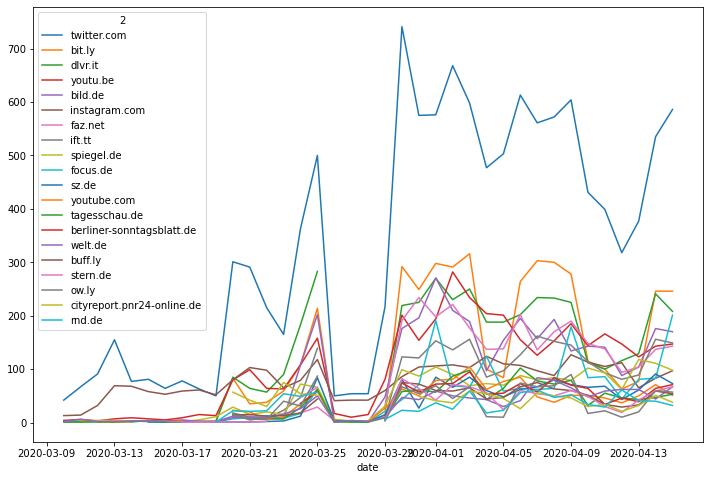

In [10]:
sources = (
    df.urls.str.split("/", n=3, expand=True)[2]
    .str.replace("www.", "")
)

top_twenty_sources = sources.value_counts()[:20].index

(
    df.merge(sources, left_index=True, right_index=True).groupby(df.date.dt.date)[2]
    .value_counts().unstack()[top_twenty_sources].plot(figsize=(12, 8))
)

At last, here is a sample of 1,000 tweets which you can explore yourself. To gain access to the whole corpus, please, reach out to us.

In [11]:
df.sample(1000, random_state=1).to_csv("tweets.csv")